In [ ]:
# Topic: Neural Networks !

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from typing import Union, Callable, List
import random
from itertools import compress
import numpy as np 
import time
from apyori import apriori
from sklearn import tree

print("imports successful!")

imports successful!


In [53]:
def load_iris(test_split:float =0.2):
    iris=datasets.load_iris()

    x = iris.data
    y = iris.target

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_split)
    return x_train, x_test, y_train, y_test

### Part C

In [84]:
class Perceptron:
    
    def __init__(self, learning_rate=0.1):
        
        self.learning_rate = learning_rate
        self._b = 0.0
        self._w = None
        self.misclassified_samples = []
        
    def fit(self, x: np.array, y: np.array, n_iter=10):
        self._b = 0.0
        self._w = [[2*np.random.random()-1 for i in range(x.shape[1])] for j in range(len(np.unique(y)))]
        self.misclassified_samples = []
        
        for _ in range(n_iter):
            
            errors = 0
        
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b += update
                self._w = [w+update*xi for w in self._w]
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)
        
    def f(self, x: np.array) -> float: 
        return [np.dot(x, w) + self._b for w in self._w]
    
    def predict(self, x:np.array):
        return np.argmax(self.f(x), axis=0)
    
    def plot(self):
        plt.plot(1+np.arange(len(self.misclassified_samples)), self.misclassified_samples)
        plt.xlabel('Epoch')
        plt.ylabel('# of missclassified Samples')
        plt.title('Performance of Perceptron at each Epoch')
        plt.show()

### Parts a and b 

In [85]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
classifier = Perceptron(learning_rate=0.01)

#display x_test
print("Features")
print("Sepal Length (cm)  Sepal Width")
print(x_train[0:4, :])

print("Classifications")
print("0 -Iris-setosa, 1-Iris Versicolour, 2-Iris Virginica")
print(y_test[0:4])



Features
Sepal Length (cm)  Sepal Width
[[4.4 3.2 1.3 0.2]
 [6.1 2.9 4.7 1.4]
 [5.5 2.5 4.  1.3]
 [6.3 2.7 4.9 1.8]]
Classifications
0 -Iris-setosa, 1-Iris Versicolour, 2-Iris Virginica
[2 1 0 2]


### Part d

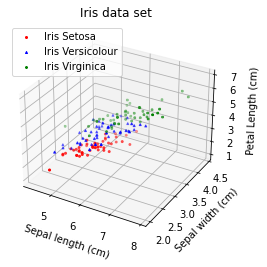

In [86]:
fig = plt.plot
ax = plt.axes(projection='3d')
ax.set_title('Iris data set')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal Length (cm)')

ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
           marker='o', s=4, label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
           marker='^', s=4, label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
           marker='x', s=4, label="Iris Virginica")

plt.legend(loc='upper left')
plt.show()

In [87]:
iris=datasets.load_iris()

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)
classifier = Perceptron(learning_rate=0.01)

In [88]:
classifier.fit(x_train, y_train)

predictions = classifier.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
print(accuracy_score(y_test, predictions))

TypeError: Singleton array 21 cannot be considered a valid collection.

### Part e 

In [ ]:
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train, 200)

y_predict = classifier.predict(x_test)
print(accuracy_score(y_test, y_predict))
classifier.plot()

## Question 2 ( See Tensorflow approach for better results)

In [32]:
class ActivationFunction:
    sigmoid = lambda x: 1 / (1 + np.exp(-x))
    relu = lambda x: x * (x > 0)
    relu_leaky = lambda x: x * (x >= 0) + 0.01 * x * (x < 0)
    tanh = lambda x: np.tanh(x)
    softmax = lambda x: np.exp(x-np.max(x)) / np.sum(np.exp(x-np.max(x)))

    sigmoid_deriv = lambda x: x * (1 - x)
    relu_deriv = lambda x: float(x >= 0)
    relu_leaky_deriv = lambda x: 0.01 * (x < 0) + (x >= 0)
    tanh_deriv = lambda x: 1 - np.square(ActivationFunction.tanh(x))
    softmax_deriv = lambda x: softmax_deriv(x)

    def __init__self(self, x=None):
        self.x = x


class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__


def get_default_params():
    params = {
        "learning_rate": 0.05,
        "act_fun": ActivationFunction.relu_leaky,
        "act_fun_deriv": ActivationFunction.relu_leaky_deriv,
        "depth": 2,
        "input_drop_rate": 0.2,
        "hidden_layer_drop_rate": 0.05,
        "n_elements_input": 4,
        # should be the number of components or elements in the input layer (i.e., pixel, component, etc.)
        "n_neurons_hidden": 5,
        "n_neurons_output": 3,  # this should be the number of classifieers in classification network
        "max_epochs": 20,
        "hiddenValueBias": -1,
        "outputValueBias": -1,
        "momentum": 1.0
    }

    return dotdict(params)

### My Own Custom Implementation (Doesn't work as well, but spent 30+ hours on it, may as well include it too)

In [20]:
def has_length(obj):
    return isinstance(obj, list) or isinstance(obj, tuple) or isinstance(obj, np.ndarray)
    
    
class MultiLayerPerceptron:

    def __init__(self,
                 params_in=None
                 ):

        params = get_default_params() if params_in is None else params_in

        self.learning_rate = params.learning_rate
        self.depth = params.depth
        self.momentum = params.momentum

        self.act_fun = params.act_fun
        self.act_fun_deriv = params.act_fun_deriv

        self.input_drop_rate = params.input_drop_rate
        self.hidden_layer_drop_rate = params.hidden_layer_drop_rate

        self.n_elements_input = params.n_elements_input
        self.n_neurons_hidden = params.n_neurons_hidden

        # this should equal the number of distinct classifiers
        self.n_neurons_output = params.n_neurons_output

        # this could be changed for non classifier networks
        self.n_classes = self.n_neurons_output

        self.max_epochs = params.max_epochs

        self.hiddenValueBias = params.hiddenValueBias
        self.outputValueBias = params.outputValueBias

        # error checking
        n_funs = 1 if not has_length(params.act_fun) else len(params.act_fun)
        n_derivs = 1 if not has_length(params.act_fun_deriv) else len(params.act_fun_deriv)

        if n_funs != n_derivs:
            raise ValueError('Pass in an equal number of derivatives to correspond to each activation function!')

        # SET ACTIVATION FUNCTIONS
        ################################################################
        if n_funs != self.depth or n_funs == 1:
            if n_funs == 1:
                self.act_fun = [params.act_fun for _ in range(self.depth)]
                self.act_fun_deriv = [params.act_fun_deriv for _ in range(self.depth)]
            else:
                raise ValueError('Enter activation functions for each layer if not using a function uniformly')
        else:
            self.act_fun = params.act_fun
            self.act_fun_deriv = params.act_fun_deriv

        ################################################################

        # SET THE WEIGHTS
        ################################################################
        self.WEIGHTS_HIDDEN = []

        for k in range(self.depth-1):
            if k == 0:
                # dealing with the input signal here
                self.WEIGHTS_HIDDEN.append(self.init_starting_weights(self.n_neurons_hidden, self.n_elements_input))
            else:  # connects to the input layer
                self.WEIGHTS_HIDDEN.append(self.init_starting_weights(self.n_neurons_hidden, self.n_neurons_hidden))


        self.WEIGHTS_OUTPUT = self.init_starting_weights(self.n_neurons_output, self.n_neurons_hidden)
        ################################################################

        # SET THE BIASES
        ################################################################
        self.BIAS_hidden = []
        for k in range(self.depth-1):
            self.BIAS_hidden.append(np.array([self.hiddenValueBias for i in range(self.n_neurons_hidden)]))

        self.BIAS_output = np.array([self.outputValueBias for i in range(self.n_neurons_output)])
        ################################################################

        # pre initialize the layer outputs
        self.OUTPUT_HIDDEN = [np.zeros(self.n_neurons_hidden) for _ in range(self.depth-1)]
        self.OUTPUT_OUTPUT_LAYER = None

        # error related terms
        self.total_error = float(0)

        # output summary stuff
        self.error_array = []
        self.epoch_array = []

        self.W_Hidden_collection = []
        self.W_outputs = []

        self.hidden_mask = [np.ones(self.n_neurons_hidden) > 0 for _ in range(self.depth-1)]
        self.input_mask = np.ones(self.n_elements_input) > 0

    def _getInputLayerDropMask(self):

        mask = np.random.binomial(1, 1.0-self.input_drop_rate, self.n_elements_input).astype(int)
        return mask > 0

    def _getHiddenLayerDropMask(self):

        mask = np.random.binomial(1, 1.0-self.hidden_layer_drop_rate, self.n_neurons_hidden).astype(int)
        return mask > 0

    def init_starting_weights(self, n_outputs, n_inputs):
        return [[2 * random.random() - 1 for i in range(n_outputs)] for j in range(n_inputs)]

    def _get_petals_desired(self, y):

        output = np.zeros(self.n_classes)

        if y == 0:
            output = np.array([1, 0, 0])
        elif y == 1:
            output = np.array([0, 1, 0])
        elif y == 2:
            output = np.array([0, 0, 1])

        return output

    def _encode_output_layer(self):
        output_layer = self.OUTPUT_OUTPUT_LAYER
        encoded = np.zeros(3)
        indeces = np.where(output_layer == np.max(output_layer))[0]
        index = indeces[0]
        encoded[index] = 1
        return encoded

    def show_err_graphic(self, v_erro, v_epoca):
        plt.figure(figsize=(9, 4))
        plt.plot(v_epoca, v_erro, "m-", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared Error (MSE) ")
        plt.title("Error Minimization")
        plt.show()

    def _prop_forward(self, x_element):

        # this is kind of hard coded for classifier network, but that will suffice for the homework
        self.output = np.zeros(self.n_neurons_output)

        # weights applied to the input layer are the first element of the hidden weights

        # drop the input layer components as deemed neccessary
        input_dropped = list(compress(x_element, self.input_mask))
        weights_input_dropped = list(compress(self.WEIGHTS_HIDDEN[0], self.input_mask))

        # we also need to drop the first hidden layer in addition to any input layer drops
        weights_dropped = [list(compress(weight_set, self.hidden_mask[0])) for weight_set in weights_input_dropped]
        bias_dropped = np.array(list(compress(self.BIAS_hidden[0], self.hidden_mask[0])))

        induced_field_L1 = np.dot(input_dropped, weights_dropped) + bias_dropped.T

        self.OUTPUT_HIDDEN[0] = self.act_fun[0](induced_field_L1)

        # now we iterate through all the hidden layers
        induced_field_hidden: np.ndarray = None
        tmp_inputs = self.OUTPUT_HIDDEN[0]

        # only drop the inputs once to account for the hidden layer mask
        # handle all the dense neurons
        for k in range(1, self.depth - 1):
            # now the number of inputs have possibly changed, adjust current layer weights for that
            weights_adjusted = list(compress(self.WEIGHTS_HIDDEN[k], self.hidden_mask[k-1]))
            # adjust weights and bias for the loss of current hidden layer node in the output dimension
            dropped_weights = [list(compress(weight, self.hidden_mask[k])) for weight in weights_adjusted]
            dropped_bias = np.array(list(compress(self.BIAS_hidden[k], self.hidden_mask[k])))

            induced_field_hidden = np.dot(tmp_inputs, dropped_weights) + dropped_bias.T
            self.OUTPUT_HIDDEN[k] = self.act_fun[1](induced_field_hidden)
            tmp_inputs = self.OUTPUT_HIDDEN[k]

        # now we do computation on the output layer
        # adjust for loss of input due to the previous layer drop
        dropped_output_weights = list(compress(self.WEIGHTS_OUTPUT, self.hidden_mask[-1]))
        # we have no output layer drop rate, so no need for adjustment in the output dimension

        output_layer_field = np.dot(tmp_inputs, dropped_output_weights) + self.BIAS_output.T
        self.OUTPUT_OUTPUT_LAYER = self.act_fun[-1](output_layer_field)

    def _calc_error_energy(self):

        square_error = 0

        #encoded_outputs = self._encode_output_layer()
        output_layer = self.OUTPUT_OUTPUT_LAYER

        for i in range(self.n_neurons_output):
            erro = np.square(self.output[i] - output_layer[i])
            #erro = np.square(self.output[i] - encoded_outputs[i])
            square_error = (square_error + (0.5 * erro))

        return square_error

    def Backpropagation(self, x):

        DELTA_output = []

        # stage 1 - Error: Output layer
        ERROR_output = self.output - self.OUTPUT_OUTPUT_LAYER
        if not (self.act_fun[-1] == ActivationFunction.softmax):
            DELTA_output = ((-1) * (ERROR_output) * self.act_fun_deriv[-1](self.OUTPUT_OUTPUT_LAYER))
        else:
            DELTA_output = -1 * self.act_fun_deriv[-1](self.OUTPUT_OUTPUT_LAYER) @ ERROR_output


        arrayStore = []

        # Stage 2 - update the weights for the layers
        current_weights = list(compress(self.WEIGHTS_OUTPUT, self.hidden_mask[-1]))
        input_index = np.arange(len(self.hidden_mask[-1]))
        input_index = list(compress(input_index, self.hidden_mask[-1]))

        for i in range(len(current_weights)):
            idx_i = input_index[i]
            for j in range(self.n_neurons_output):
                if not (self.act_fun[-1] == ActivationFunction.softmax):
                    self.WEIGHTS_OUTPUT[idx_i][j] = self.momentum * current_weights[i][j] - (
                                self.learning_rate * (DELTA_output[j] * self.OUTPUT_HIDDEN[-1][i]))
                    self.BIAS_output[j] -= (self.learning_rate * DELTA_output[j])
                else:
                    self.WEIGHTS_OUTPUT[idx_i][j] = self.momentum * current_weights[i][j] - (
                                self.learning_rate * (DELTA_output[j] @ np.array(self.OUTPUT_HIDDEN[-1][i])).T)
                    self.BIAS_output[j] = 0.0

        # the k index here represents the hidden layer number
        delta_prev = DELTA_output
        weights_prev = current_weights
        delta_hidden = np.matmul(weights_prev, delta_prev) * self.act_fun_deriv[-1](self.OUTPUT_HIDDEN[-1])
        # update the hidden layers

        for k in range(self.depth - 2, 0, -1):

            current_weights = list(compress(self.WEIGHTS_HIDDEN[k], self.hidden_mask[k-1]))
            n_in = len(current_weights)
            current_weights = [list(compress(weight, self.hidden_mask[k])) for weight in current_weights]
            n_out = len(current_weights[0])

            input_index = np.arange(len(self.hidden_mask[k-1]))
            input_index = list(compress(input_index, self.hidden_mask[k-1]))

            output_index = np.arange(len(self.hidden_mask[k]))
            output_index = list(compress(output_index, self.hidden_mask[k]))

            for i in range(n_in):
                idx_i = input_index[i]# what comes in (left->right)
                for j in range(n_out):  # what comes out  (left->right)
                    idx_j = output_index[j]

                    self.WEIGHTS_HIDDEN[k][idx_i][idx_j] = self.momentum * current_weights[i][j] - (
                                self.learning_rate * (delta_hidden[j] * self.OUTPUT_HIDDEN[k - 1][i]))
                    self.BIAS_hidden[k][idx_j] -= (self.learning_rate * delta_hidden[j])

            weights_prev = current_weights
            delta_hidden = np.matmul(weights_prev, delta_hidden) * self.act_fun_deriv[k](self.OUTPUT_HIDDEN[k-1])

        # update the input layer in the first hidden layer
        # delta_hidden = np.matmul(self.WEIGHTS_HIDDEN[0], delta_hidden) * self.act_fun_deriv[0](self.OUTPUT_HIDDEN[0])

        current_weights = list(compress(self.WEIGHTS_HIDDEN[0], self.input_mask))
        n_in = len(current_weights)
        current_weights = [list(compress(weights, self.hidden_mask[0])) for weights in current_weights]
        n_out = len(current_weights[0])

        input_index = np.arange(len(self.input_mask))
        input_index = list(compress(input_index, self.input_mask))

        output_index = np.arange(len(self.hidden_mask[0]))
        output_index = list(compress(output_index, self.hidden_mask[0]))

        for i in range(n_in): # number of input elements
            for j in range(n_out): # number of outputs in first hidden layer
                idx_i = input_index[i]
                idx_j = output_index[j]
                self.WEIGHTS_HIDDEN[0][idx_i][idx_j] = self.momentum * current_weights[i][j] - (
                            self.learning_rate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[0][idx_j] -= (self.learning_rate * delta_hidden[j])

    def fit(self, X, y):
        n = len(X)
        self.error_array.clear()
        self.epoch_array.clear()

        self.W_Hidden_collection.clear()
        self.W_outputs.clear()

        self.input_mask = self._getInputLayerDropMask()
        self.hidden_mask = [self._getHiddenLayerDropMask() for i in range(self.depth - 1)]

        for epoch in range(self.max_epochs):
            total_error = 0

            # update the masks upon each epoch to make the drop truly stochastic
            #self.input_mask = self._getInputLayerDropMask()
            #self.hidden_mask = [self._getHiddenLayerDropMask() for i in range(self.depth - 1)]

            for idx, inputs in enumerate(X):
                self._prop_forward(inputs)
                self.output = self._get_petals_desired(y[idx])
                total_error += self._calc_error_energy()

                # update the weights via back propagation
                self.Backpropagation(inputs)

            total_error = (total_error / n)

            if ((epoch+1) % 10 == 0) or epoch < 10:
                print("Epoch: ", epoch+1, "- Total Error: ", total_error)
                self.error_array.append(total_error)
                self.epoch_array.append(epoch+1)

            self.W_Hidden_collection.append(self.WEIGHTS_HIDDEN)
            self.W_outputs.append(self.WEIGHTS_OUTPUT)

        self.show_err_graphic(self.error_array, self.epoch_array)
        self.plot_summary()

    def plot_summary(self):

        for k in range(self.depth - 1):
            plt.plot(self.W_Hidden_collection[k][0])
            plt.title("Weights at from training at hidden layer " + str(k + 1))
            plt.ylabel("Value Weight")
            plt.legend(["neruon " + str(i + 1) for i in range(self.n_neurons_hidden)])
            plt.show()

        plt.plot(self.W_outputs[0])
        plt.title("Weights Output Layer from training")
        plt.ylabel("Value Weight")
        plt.legend(["neruon " + str(i + 1) for i in range(self.n_neurons_output)])
        plt.show()

    def score_iris(self, predictions, y):
        array_score = []

        for i in range(len(predictions)):
            if predictions[i] == 0:
                array_score.append([i, 'Iris-setosa', predictions[i], y[i]])
            elif predictions[i] == 1:
                array_score.append([i, 'Iris-versicolour', predictions[i], y[i]])
            elif predictions[i] == 2:
                array_score.append([i, 'Iris-virginica', predictions[i], y[i]])
        return array_score

    def predict(self, X, y):
        'Returns the predictions for all the elements in the set X'
        my_predictions = []

        'Forward Propagation'
        input_signal = X
        forward = None
        for weights, bias in zip(self.WEIGHTS_HIDDEN, self.BIAS_hidden):
            forward = np.matmul(input_signal, weights) + bias
            input_signal = forward

        forward = np.matmul(input_signal, self.WEIGHTS_OUTPUT) + self.BIAS_output

        for i in range(forward.shape[0]):
            index = np.where(forward[i,:]==np.max(forward[i,:]))[0]
            predict = index[0]
            my_predictions.append(predict)

        array_score = self.score_iris(my_predictions, y)

        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'desired_output'])

        return my_predictions, dataframe

### Test My Version

### Part a 

In [ ]:
    x_train, x_test, y_train, y_test = load_iris(test_split=0.2)

    params = get_default_params()

    #params.input_drop_rate = 0.2
    params.depth = 2
    params.act_fun = [ActivationFunction.relu_leaky] 
    params.act_fun_deriv = [ActivationFunction.relu_leaky_deriv]

    params.act_fun.append(ActivationFunction.softmax)
    params.act_fun_deriv.append(ActivationFunction.softmax_deriv)
    #params.act_fun.append(ActivationFunction.softmax)
    #params.act_fun_deriv.append(ActivationFunction.softmax_deriv)

    params.learning_rate = 0.005
    params.n_neurons_hidden = 5

    params.max_epochs = 10
    params.outputLayerBias = 0 

    MLP = MultiLayerPerceptron(params)

    # scale data for better convergence
    scaled_x_train = StandardScaler().fit_transform(x_train)
    scaled_x_test = StandardScaler().fit_transform(x_test)

    MLP.fit(scaled_x_train, y_train)
    predictions, df = MLP.predict(scaled_x_test, y_test)

### Tensorflow Approach

In [33]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline


def build_mlp_sklearn(params: dict, dense_fun: str = "leaky"):
    
    # create model
    # start with input layer
    model = Sequential()
    model.add(Dropout(params.input_drop_rate, input_shape=(params.n_elements_input,)))
    
    # add the hidden layers , assuming the output layer counts as part of the depth
    if dense_fun == "leaky":
        act_fun = tf.keras.layers.LeakyReLU(alpha=0.01)
    elif dense_fun == "relu":
        act_fun = dense_fun
    elif dense_fun == "sigmoid":
        act_fun = dense_fun
    else:
        raise ValueError('Enter a proper activation function ...')
        
    for i in range(params.depth - 1):
        model.add(Dense(params.n_neurons_hidden, activation=act_fun))
        model.add(Dropout(params.hidden_layer_drop_rate))
        
    # add the output layer, using softmax
    model.add(Dense(3, activation='softmax'))
    
    #Compile model 
    sgd = SGD(lr=params.learning_rate, momentum = params.momentum)
    model.compile(loss='sparse_categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
    return model 
    
    
#def score_sklearn_mlp(model: Sequential):
    

### Loading IRIS Dataset

In [34]:
# load IRIS Dataset
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris=datasets.load_iris()

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# normalize the data 
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

### Part a

In [40]:
params = get_default_params()
params.depth = 2
params.max_epochs = 10

mlp = build_mlp_sklearn(params, "leaky")
mlp.fit(x_train, y_train, epochs = params.max_epochs)
test_predictions = mlp.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, np.argmax(test_predictions, axis=1)))

confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

Epoch 1/10
4/4 [==============================] - 0s 500us/step - loss: 1.1620 - accuracy: 0.3167
Epoch 2/10
4/4 [==============================] - 0s 500us/step - loss: 0.9415 - accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 500us/step - loss: 0.6551 - accuracy: 0.7000
Epoch 4/10
4/4 [==============================] - 0s 500us/step - loss: 0.6159 - accuracy: 0.6917
Epoch 5/10
4/4 [==============================] - 0s 500us/step - loss: 0.6345 - accuracy: 0.6917
Epoch 6/10
4/4 [==============================] - 0s 250us/step - loss: 0.4347 - accuracy: 0.7417
Epoch 7/10
4/4 [==============================] - 0s 250us/step - loss: 0.6630 - accuracy: 0.7250
Epoch 8/10
4/4 [==============================] - 0s 500us/step - loss: 0.4258 - accuracy: 0.7833
Epoch 9/10
4/4 [==============================] - 0s 250us/step - loss: 0.7654 - accuracy: 0.7333
Epoch 10/10
4/4 [==============================] - 0s 250us/step - loss: 0.7385 - accuracy: 0.8000
Accuracy:  0.933333

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  0,  9]], dtype=int64)

### Part b

In [ ]:
params = get_default_params()
params.depth = 2
params.max_epochs = 10

mlp = build_mlp_sklearn(params, "sigmoid")
mlp.fit(x_train, y_train, epochs = params.max_epochs)
test_predictions = mlp.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, np.argmax(test_predictions, axis=1)))

confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

### Parb c

In [ ]:
params = get_default_params()
params.depth = 4
params.max_epochs = 10

mlp = build_mlp_sklearn(params, "leaky")
mlp.fit(x_train, y_train, epochs = params.max_epochs)
test_predictions = mlp.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, np.argmax(test_predictions, axis=1)))

confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

[[5.  3.5 1.3 0.3]
 [5.6 3.  4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [7.2 3.  5.8 1.6]
 [5.4 3.9 1.7 0.4]
 [6.1 2.9 4.7 1.4]
 [6.2 2.9 4.3 1.3]
 [5.  3.5 1.6 0.6]
 [5.6 2.9 3.6 1.3]
 [4.8 3.4 1.6 0.2]
 [7.7 3.  6.1 2.3]
 [5.7 3.8 1.7 0.3]
 [4.9 3.1 1.5 0.2]
 [5.9 3.  4.2 1.5]
 [5.4 3.4 1.5 0.4]
 [5.5 2.4 3.7 1. ]
 [5.8 4.  1.2 0.2]
 [6.4 2.8 5.6 2.1]
 [5.  3.  1.6 0.2]
 [5.5 2.3 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [6.7 3.1 4.7 1.5]
 [5.7 3.  4.2 1.2]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.2 2.7 3.9 1.4]
 [4.4 3.2 1.3 0.2]
 [6.2 2.2 4.5 1.5]
 [6.3 2.5 4.9 1.5]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.2 3.4 1.4 0.2]
 [6.1 3.  4.9 1.8]
 [7.2 3.6 6.1 2.5]
 [5.1 3.7 1.5 0.4]
 [5.1 3.5 1.4 0.2]
 [5.6 2.8 4.9 2. ]
 [6.4 3.1 5.5 1.8]
 [5.5 2.4 3.8 1.1]
 [6.8 3.2 5.9 2.3]
 [4.5 2.3 1.3 0.3]
 [4.7 3.2 1.3 0.2]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.6 1.4]
 [5.1 3.8 1.9 0.4]
 [5.6 2.5 3.9 1.1]
 [4.8 3.  1.4 0.1]
 [7.2 3.2 6.  1.8]
 [6.3 3.3 4.7 1.6]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [5.7 2.5 5.  2. ]
 [6.  2.7 5.

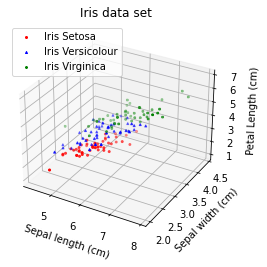

## Question 3

### Part a 

In [10]:
store_data = pd.read_csv('C:/Users/ryanm/Documents/repos/WSU/CS_7840/hw/hw2/store_data.csv')

# print a snapshot of the data
store_data.head()
records = []

start_time = time.time()
for i in range(7500):
    records.append([str(store_data.values[i,j]) for j in range(20)])
    association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

stop_time = time.time()

execution_time = stop_time - start_time 

NameError: name 'time' is not defined

### Part b

In [11]:
iteration = 1 
for item in association_rules:
    if iteration > 10:
        break
    pair = item[0]
    items = [x for x in pair]
    
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: "+str(item[2][0][2]))
    print("Lift: "+str(item[2][0][3]))
    print("=====================================")
    
    iteration += 1

Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: ground beef -> spaghetti
Support: 0.008666666666666666
Confidence: 0.3110047846889952
Lift: 3.164906221394116
Rule: olive oil -> frozen vegetables
Support: 0.0048
Confidence: 0.20338983050847456
Lift: 3.094165778526489
Rule: shrimp -> mineral water
Support: 0.0072
Confidence: 0.3068181818181818
Lift: 3.2183725365543547
Rule: spaghetti -> olive oil
Support: 0.005733333333333333
Confidence: 0.20574162679425836
Lift: 3.1299436124887174
Rule: shrimp -> spaghetti
Support: 0.006
Confidence: 0.21531100478468898
Lift: 3.0183785717479763
Rule: spaghetti -> tomatoes
Support: 0.006666666666666667
Confidence: 0.23923444976076555
Lift: 3.497579674864993
Rule: grated cheese -> spaghetti
Support: 0.005333333333333333
Confidence: 0.3225806451612903
Lift: 3.282706701098612
Rule: herb & pepper -> ground beef
Support: 0.006666666666666667
Confidence: 0.390625
Lift: 3.975152645861601
Rule: h

### Part c

In [9]:
print("Time took to run implementation for 7500 items: ", execution_time, " seconds")

Time took to run implementation for 7500 items:  -1.9500000234984327e-05  seconds


### Part d 

This association rule algorithm is useful for categorical data.  For example, this could be useful for datasets where multiple categories occur simaltaneously, and hence could be correlated.  If the training data is associated with more than one category, then it is useful to have an algorithm that can utilitze categorization rules.  This could be especially useful for survey datasets that are more behaviorally driven.  An example dataset would be the Zoo dataset, where different animals can exhibit similar features, but yet be different.

## Question 4

(See Orange File Attachment)

## Question 5

In [47]:
def print_score(y_test, y_pred):
    print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    print("Precision: ", metrics.precision_score(y_test, y_pred))

    print("Recall: ", metrics.recall_score(y_test, y_pred))

### Part a & b

In [13]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer()

print("Features: ", cancer.feature_names)
print("\n")
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Labels:  ['malignant' 'benign']


### Part c

In [49]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=109)

### Part d 

In [50]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='linear') # Linear kernel
clf.fit(x_train, y_train)

SVC(kernel='linear')

### Part e 

In [51]:
y_pred = clf.predict(x_test)

### Part f 

In [52]:
print_score(y_test, y_pred)

Accuracy:  0.9649122807017544
Precision:  0.9811320754716981
Recall:  0.9629629629629629


### Part g

(See Orange Attachment)

## Question 6 

In [61]:
x_train, x_test, y_train, y_test = load_iris(0.2)

classifier = tree.DecisionTreeClassifier()


### Part a 

In [62]:
x_first_two_train = x_train[:, 0:2]

x_first_two_train

array([[5.9, 3. ],
       [5.5, 3.5],
       [7.2, 3. ],
       [6.7, 3. ],
       [6. , 2.2],
       [5.3, 3.7],
       [5.6, 2.9],
       [6. , 2.7],
       [5.8, 2.7],
       [4.8, 3.4],
       [5.9, 3. ],
       [4.8, 3. ],
       [5.7, 2.5],
       [7.3, 2.9],
       [6.4, 3.2],
       [5. , 3.3],
       [6.2, 2.9],
       [7.6, 3. ],
       [5.7, 2.8],
       [5.6, 3. ],
       [6.1, 2.8],
       [6.3, 3.3],
       [6.7, 3.3],
       [6.4, 2.8],
       [6.2, 2.8],
       [6.7, 3.1],
       [6.5, 3. ],
       [6. , 2.2],
       [6.4, 2.8],
       [5.6, 3. ],
       [5.8, 2.7],
       [4.7, 3.2],
       [6.3, 2.5],
       [6.8, 2.8],
       [6.3, 2.3],
       [5. , 2. ],
       [4.9, 3.6],
       [7.9, 3.8],
       [5.1, 3.7],
       [5. , 3.4],
       [5.6, 2.7],
       [4.9, 3. ],
       [6.9, 3.2],
       [5.7, 2.9],
       [7.2, 3.2],
       [5.1, 3.5],
       [6.1, 3. ],
       [5.5, 2.4],
       [5.5, 2.5],
       [6.8, 3.2],
       [5.2, 2.7],
       [6.5, 2.8],
       [6. ,

Accuracy:  0.6


[Text(127.04464285714286, 209.6742857142857, 'X[0] <= 5.45\ngini = 0.666\nsamples = 120\nvalue = [42, 40, 38]'),
 Text(47.82857142857143, 194.14285714285714, 'X[1] <= 2.8\ngini = 0.214\nsamples = 42\nvalue = [37, 4, 1]'),
 Text(35.871428571428574, 178.61142857142858, 'X[0] <= 4.95\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(23.914285714285715, 163.07999999999998, 'X[1] <= 2.4\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(11.957142857142857, 147.54857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(35.871428571428574, 147.54857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(47.82857142857143, 163.07999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(59.785714285714285, 178.61142857142858, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(206.2607142857143, 194.14285714285714, 'X[0] <= 6.35\ngini = 0.558\nsamples = 78\nvalue = [5, 36, 37]'),
 Text(137.50714285714287, 178.61142857142858, 'X[1] <= 3.45\ngini = 0.523\nsample

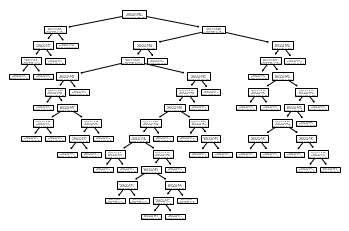

In [64]:
clf = classifier.fit(x_first_two_train, y_train)
y_pred_tree = clf.predict(x_test[:, 0:2])

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))

tree.plot_tree(clf)

### Part b 

In [65]:
print("SVM Method Comparison for first two features ...")

clf = svm.SVC(kernel='linear') # Linear kernel
clf.fit(x_first_two_train, y_train)
y_pred_svm = clf.predict(x_test[:, 0:2])

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_svm))

SVM Method Comparison for first two features ...
Accuracy:  0.7666666666666667


The decision tree is binary in nature, and has to split the data in a binary nature.  The SVM method, however, can account for more curved and irregular data separation patterns, which could result in better performance.  The decision tree is more limited, especially when not used in the context of a random forest model.  The decision tree, however, is simpler to run.  Depending on the degree of overlap of the points in this dataset, which there seems to be a decent degree of, may require an intricate selection of the cost parameter in the svm model, and could need to be adjusted.

In this case, the svm model outperformed the decision tree model, as evidenced by the difference in accuracy scores.  The svm may be able to caputre the complex boundaries better.  Also, it is possible that the tree model needs a different pairing of features as well.

### Part c

In [ ]:
# testing different pairings:
classifier = tree.DecisionTreeClassifier()

clf = classifier.fit(x_first_two_train, y_train)
# use the other two features
y_pred_tree = clf.predict(x_test[:, 2:4])

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))

tree.plot_tree(clf)

Accuracy:  0.2


[Text(127.04464285714286, 209.6742857142857, 'X[0] <= 5.45\ngini = 0.666\nsamples = 120\nvalue = [42, 40, 38]'),
 Text(47.82857142857143, 194.14285714285714, 'X[1] <= 2.8\ngini = 0.214\nsamples = 42\nvalue = [37, 4, 1]'),
 Text(35.871428571428574, 178.61142857142858, 'X[0] <= 4.95\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(23.914285714285715, 163.07999999999998, 'X[0] <= 4.7\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(11.957142857142857, 147.54857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(35.871428571428574, 147.54857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(47.82857142857143, 163.07999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(59.785714285714285, 178.61142857142858, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(206.2607142857143, 194.14285714285714, 'X[0] <= 6.35\ngini = 0.558\nsamples = 78\nvalue = [5, 36, 37]'),
 Text(137.50714285714287, 178.61142857142858, 'X[1] <= 3.45\ngini = 0.523\nsample

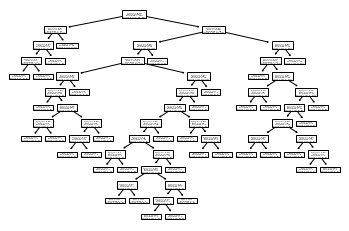

In [67]:
# testing different pairings:
classifier = tree.DecisionTreeClassifier()

clf = classifier.fit(x_first_two_train, y_train)
# stagger the features 
y_pred_tree = clf.predict(x_test[:,[0,2]])

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))

tree.plot_tree(clf)

In [ ]:
# testing different pairings:
classifier = tree.DecisionTreeClassifier()

clf = classifier.fit(x_first_two_train, y_train)
# stagger the features 
y_pred_tree = clf.predict(x_test[:,[1,3]])

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_tree))

tree.plot_tree(clf)

### Part d

(See Orange Attachment)

## Question 7